# Beijing Multi-Site Air-Quality data Analysis



In [41]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
from sklearn import preprocessing

In [42]:
df1 = pd.read_csv("csv/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
df2 = pd.read_csv("csv/PRSA_Data_Changping_20130301-20170228.csv")
df3 = pd.read_csv("csv/PRSA_Data_Dingling_20130301-20170228.csv")
df4 = pd.read_csv("csv/PRSA_Data_Dongsi_20130301-20170228.csv")
df5 = pd.read_csv("csv/PRSA_Data_Guanyuan_20130301-20170228.csv")
df6 = pd.read_csv("csv/PRSA_Data_Gucheng_20130301-20170228.csv")
df7 = pd.read_csv("csv/PRSA_Data_Huairou_20130301-20170228.csv")
df8 = pd.read_csv("csv/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
df9 = pd.read_csv("csv/PRSA_Data_Shunyi_20130301-20170228.csv")
df10 = pd.read_csv("csv/PRSA_Data_Tiantan_20130301-20170228.csv")
df11 = pd.read_csv("csv/PRSA_Data_Wanliu_20130301-20170228.csv")
df12 = pd.read_csv("csv/PRSA_Data_Wanshouxigong_20130301-20170228.csv")

In [43]:
frames = [df1, df2, df3,df4, df5, df6,df7, df8, df9,df10,df11, df12]
data = pd.concat(frames)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


In [53]:
data.dtypes

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

In [54]:
data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [55]:
data=data.rename(columns ={'wd':'wind_direction','DEWP':'dew_point_temp','TEMP':'temp','RAIN':'rain','WSPM':'wind_speed','PRES':'pressure'})

In [56]:
data.isna().sum()

No                    0
year                  0
month                 0
day                   0
hour                  0
PM2.5              8739
PM10               6449
SO2                9021
NO2               12116
CO                20701
O3                13277
temp                398
pressure            393
dew_point_temp      403
rain                390
wind_direction     1822
wind_speed          318
station               0
dtype: int64

In [57]:
data['PM10'].fillna(data['PM10'].median(), inplace=True)
data['PM2.5'].fillna(data['PM2.5'].median(), inplace=True)
data['SO2'].fillna(data['SO2'].median(), inplace=True)
data['CO'].fillna(data['CO'].median(), inplace=True)
data['O3'].fillna(data['O3'].median(), inplace=True)

In [58]:
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,temp,pressure,dew_point_temp,rain,wind_direction,wind_speed,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [59]:
data.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,temp,pressure,dew_point_temp,rain,wind_direction,wind_speed,station
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong
35063,35064,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong


Point Plot:

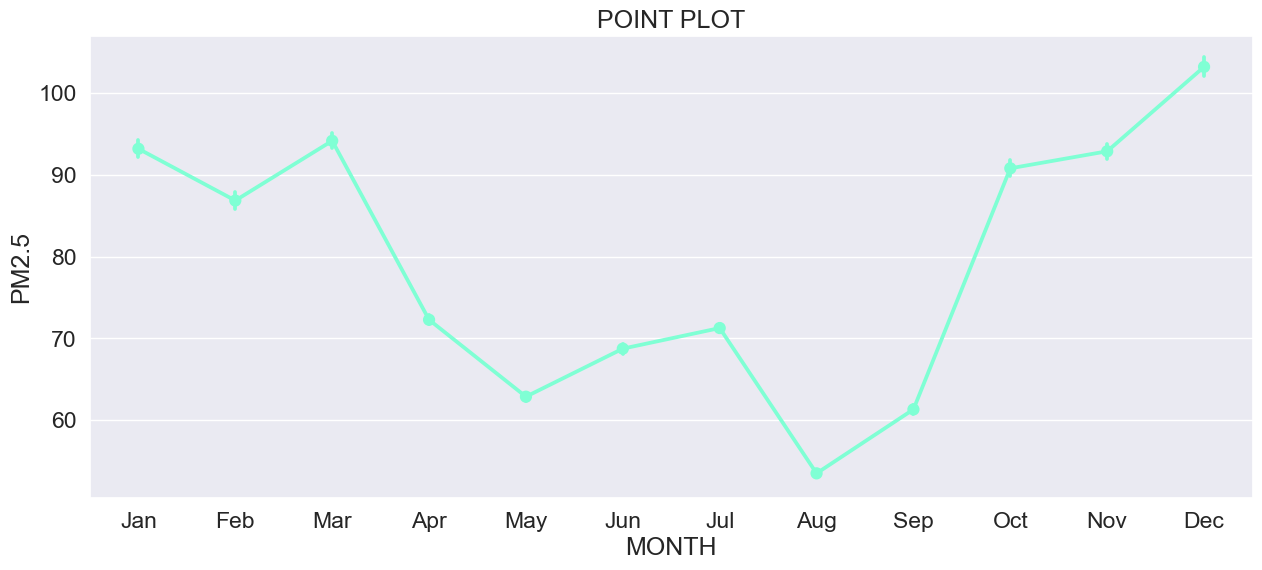

In [60]:
plt.figure(figsize=(15,6))
sns.set(font_scale=1.5)
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig = sns.pointplot(x="month", y="PM2.5", data=data,color="#7FFFD4").set_xticklabels(labels)
plt.xlabel("MONTH")
plt.ylabel("PM2.5")
plt.title("POINT PLOT")
plt.show(fig)

Using the Point plot, we can see that the PM2.5 levels hit all time low in August and all time high in December in these 5 years from 2013 to 2017

Box Plot:

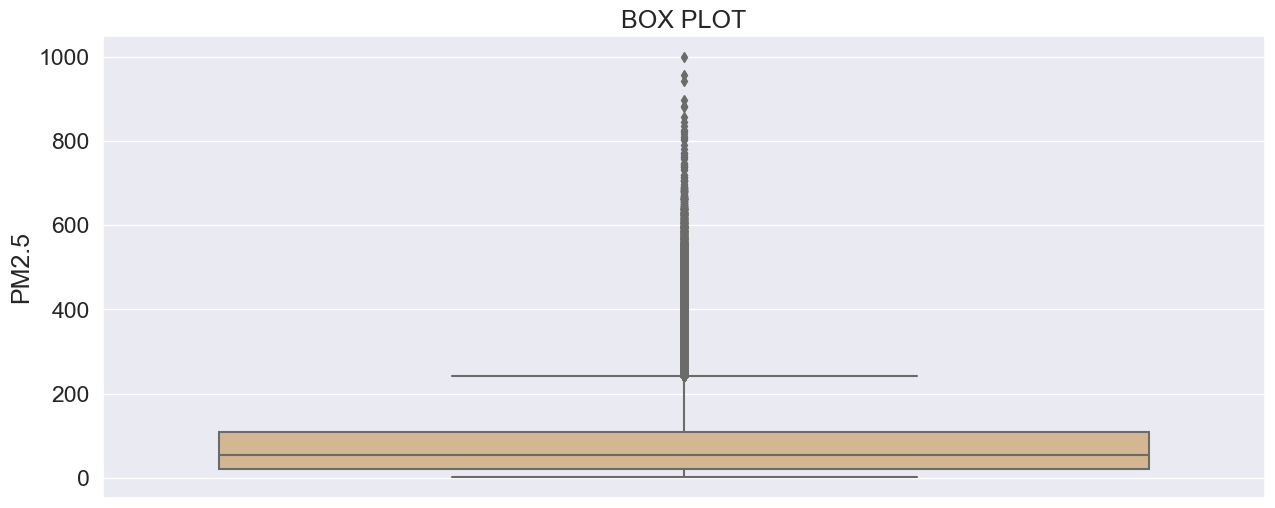

In [61]:
plt.figure(figsize=(15,6))
sns.set(font_scale=1.5)
fig1=sns.boxplot(y=data["PM2.5"],color="#DEB887")
plt.title("BOX PLOT")
plt.show(fig1)

From the box plot abow, we can say that almost all the stations have lower PM2.5 values and the 25 to 75 percentile ranges from 25 to 150.And there are many outliers. The distribution is right skewed as we can see there are many values to the right and median to the left.

Density Plot:

Text(0.5, 1.0, 'Density plot of the target variable')

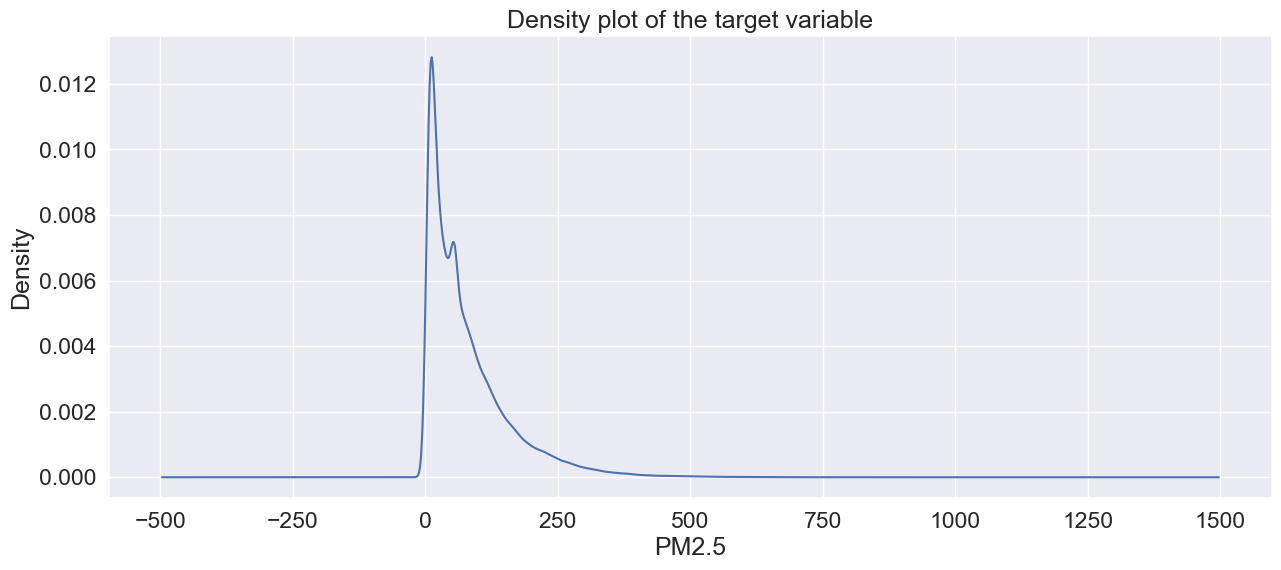

In [62]:
plt.figure(figsize=(15,6))
sns.set(font_scale=1.5)
fig10=data['PM2.5'].plot.density()
plt.xlabel('PM2.5')
plt.title("Density plot of the target variable")

Histogram Plot:

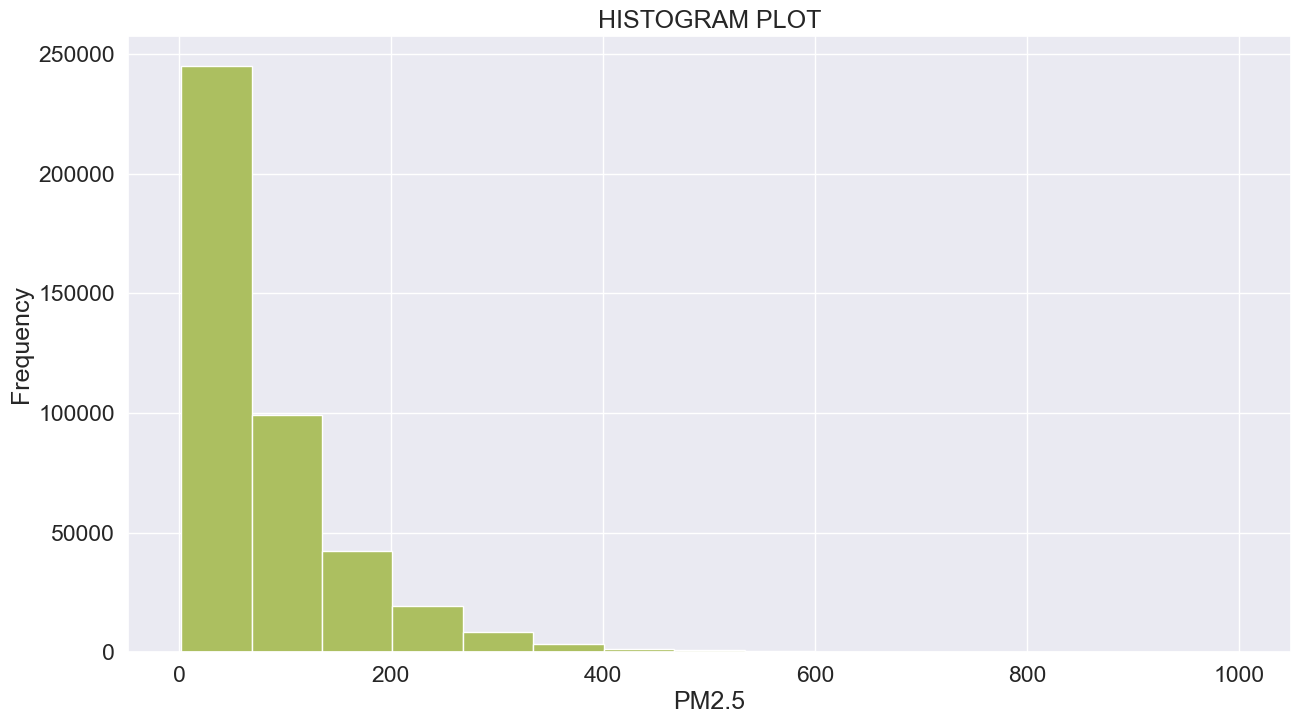

In [63]:
plt.figure(figsize=(15,6))
fig3=data['PM2.5'].hist(bins=15,figsize=(15,8),color="#acbf60")
plt.title("HISTOGRAM PLOT")
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.show(fig3)

The distribution of the target variable is right skewed as the right tail contains more values. More than 60% of the dataset values is in the range of 0 to 200.

Correlation Matrix:

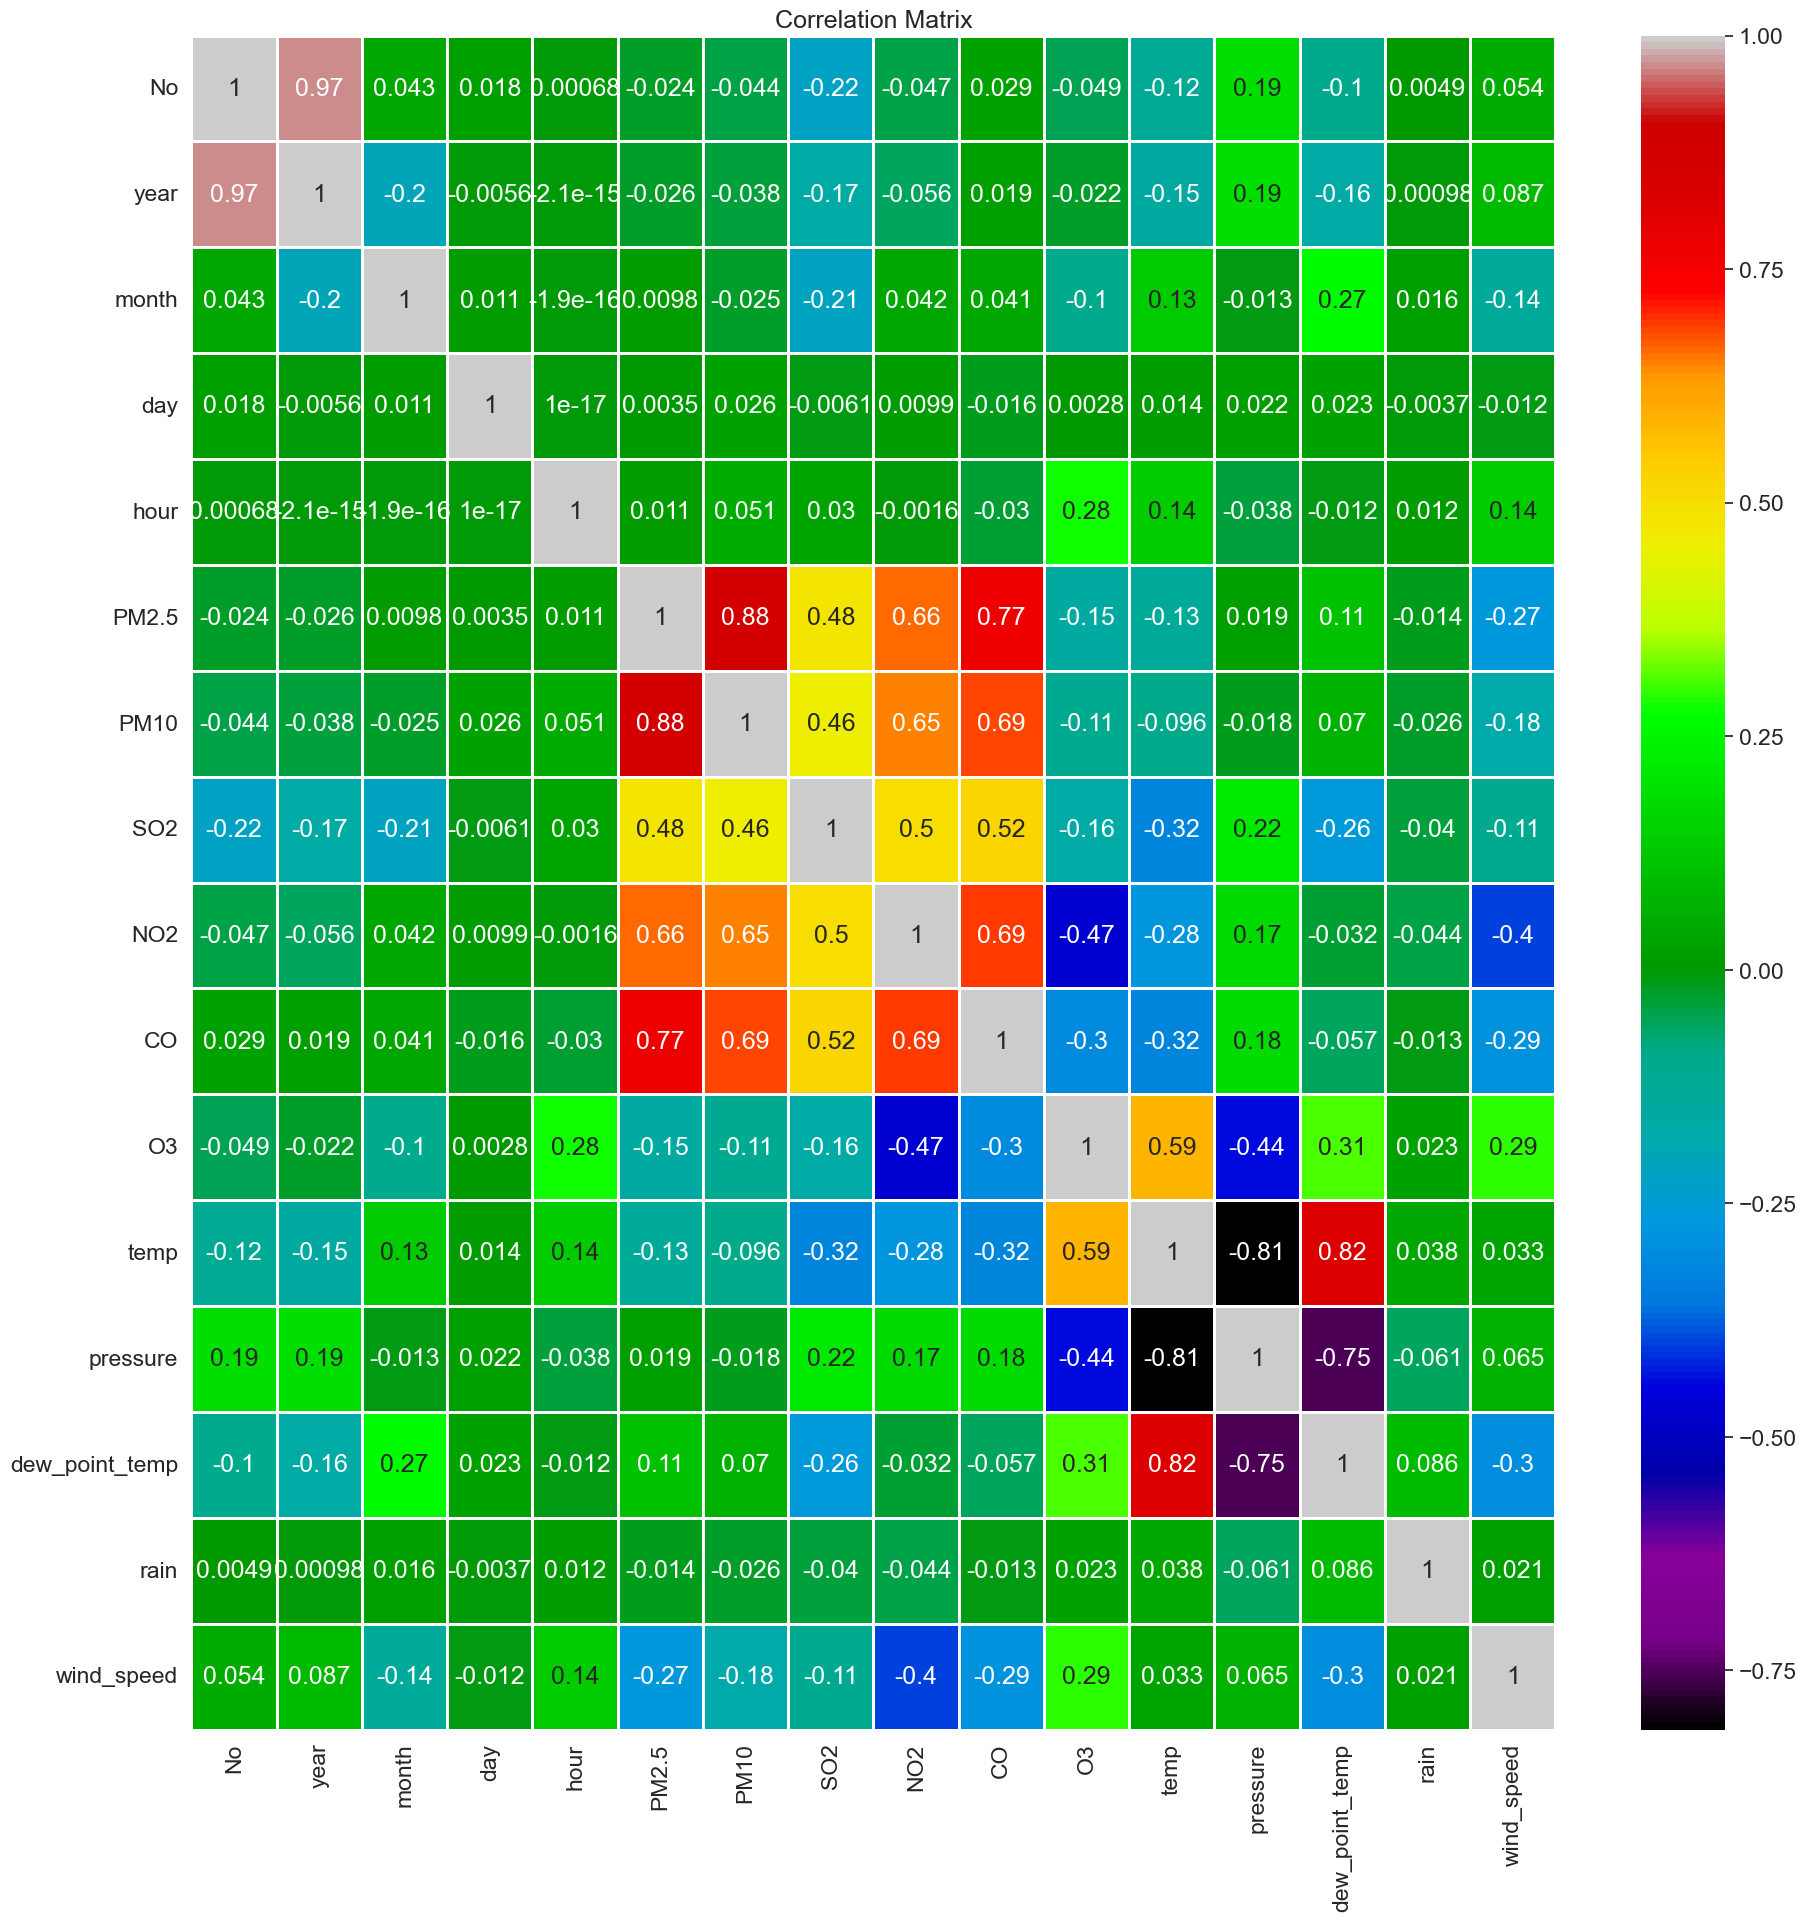

In [64]:
plt.figure(figsize=(22, 22))
plt.title('Correlation Matrix')
sns.heatmap(data.corr(), annot=True, linewidth = 0.75,cmap="nipy_spectral")
plt.show()


Year Wise PM2.5 Level

Text(0.5, 1.0, 'Year Wise PM2.5 Level')

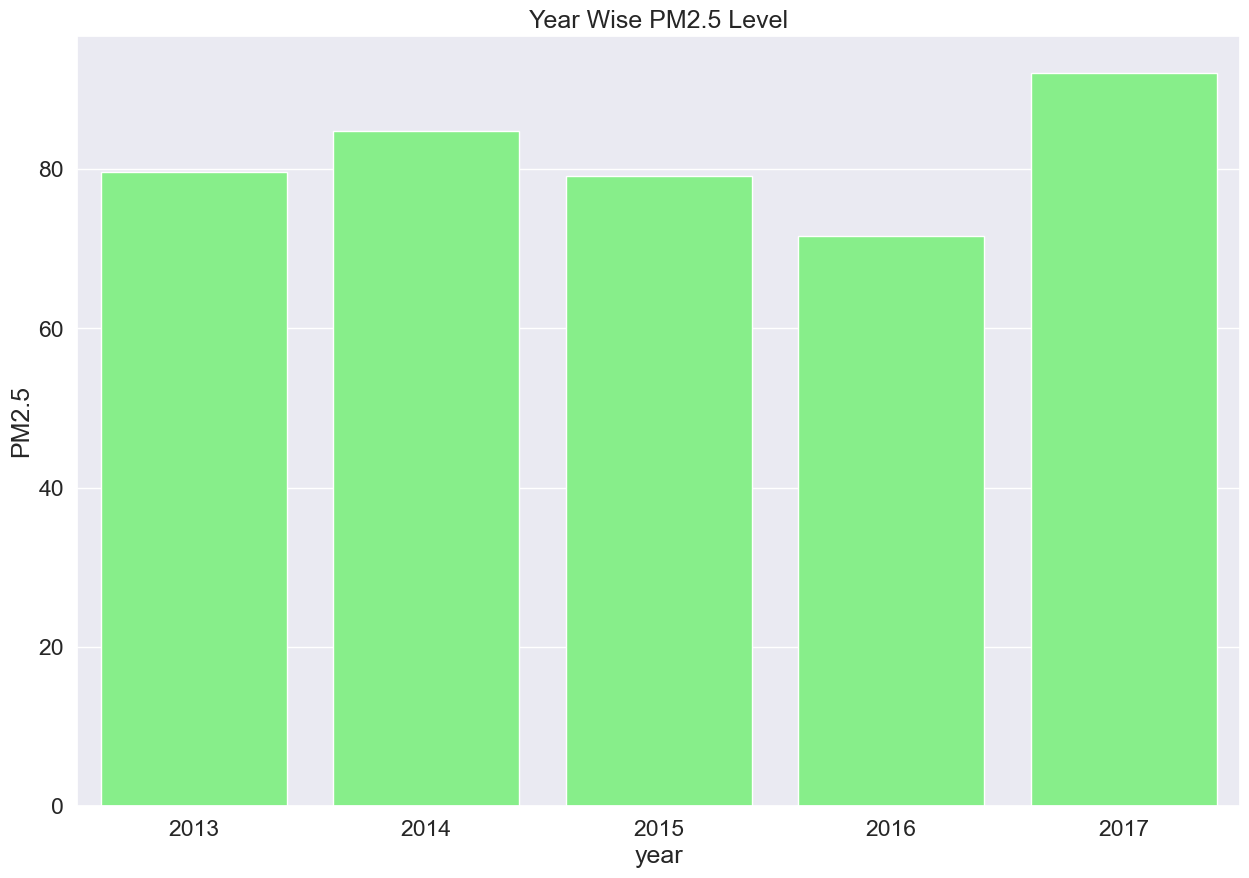

In [65]:
df = data[['PM2.5','year']].groupby(["year"]).mean().reset_index().sort_values(by='year',ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x='year', y='PM2.5', data=df, color='#76ff7a')

plt.title('Year Wise PM2.5 Level')

Highest Hour Pollution Level:

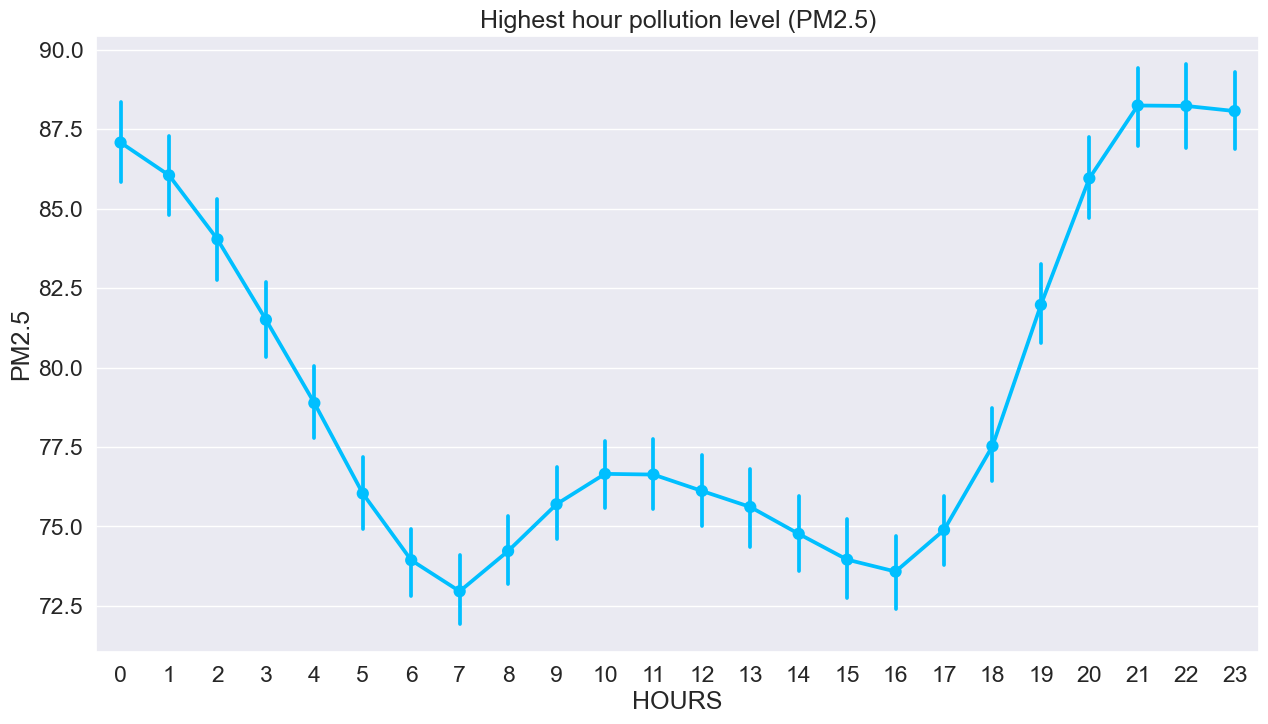

In [66]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
fig5=sns.pointplot(x='hour',y='PM2.5',data=data,color="#00bfff")
plt.xlabel("HOURS")
plt.ylabel("PM2.5")
plt.title("Highest hour pollution level (PM2.5)")
plt.show(fig5)

From the plot above we can observe that from 2013 to 2017, The change in levels of PM2.5  are least in the morning at 7am. PM2.5 level are very high in the evening. The Highest pollution hour is at 21:00hrs 